In [3]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/syedmuneeb/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/syedmuneeb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/syedmuneeb/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/syedmuneeb/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [5]:
test_data = pd.read_csv("data/test.csv")

In [6]:
test_data['cleaned_reviews'] = test_data['review'].str.replace(pat= '[^A-Za-z]+', repl = ' ', regex=True)

In [7]:
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

In [8]:
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word.lower(), pos_dict.get(tag[0])]))
    return newlist

In [9]:
test_data['POS_tagged'] = test_data['cleaned_reviews'].apply(token_stop_pos)

In [10]:
nltk.download('sentiwordnet')

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/syedmuneeb/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

In [11]:
wordnet_lemmatizer = WordNetLemmatizer()
def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue
            # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
    if not tokens_count:
        return 0

    if sentiment>=0:
        return "positive"
    # if sentiment==0:
        # return "neutral"
    else:
        return "negative"

In [12]:
test_data['predicted_sentiment'] = test_data['POS_tagged'].apply(sentiwordnetanalysis)

In [13]:
test_data[['review','sentiment', 'predicted_sentiment']]

,review,sentiment,predicted_sentiment
0,Steven Rea plays a forensic scientist thrust o...,positive,negative
1,As the first of the TV specials offered on the...,positive,positive
2,There may something poetically right in seeing...,negative,positive
3,all i can say about this film is to read the b...,negative,positive
4,I thought it was a pretty good movie and shoul...,positive,positive
...,...,...,...
19995,Well-done ghost story that will give you the c...,positive,positive
19996,I'm at a loss for words. This movie is beyond ...,negative,negative
19997,"First off, I had my doubts just looking at the...",negative,positive
19998,"In an early scene, Luca (David Pasquesi) and J...",positive,positive


In [14]:
accuracy_score(test_data['sentiment'], test_data['predicted_sentiment'])

0.6448

In [18]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, normalize="true")
    classes = y_true.unique()
    
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjust font scale
    sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, 
                annot_kws={'size': 14}, linewidths=0.5, 
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted labels', fontsize=14)
    plt.ylabel('True labels', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

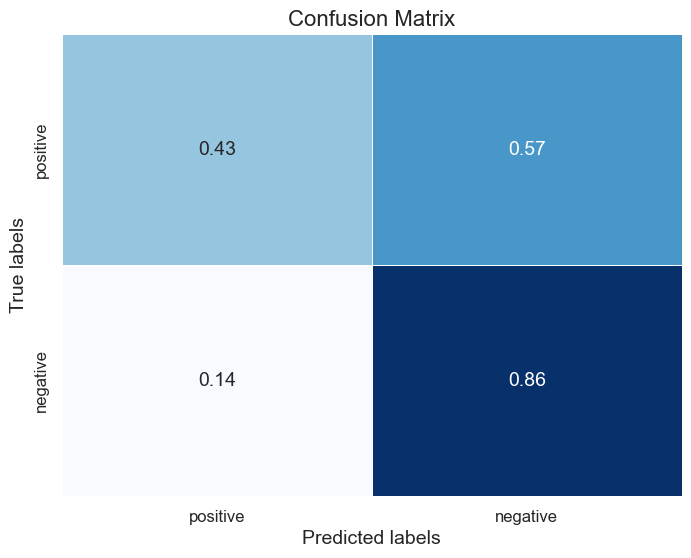

In [19]:
plot_confusion_matrix(test_data['sentiment'], test_data['predicted_sentiment'])